In [2]:
import os

import warnings
warnings.filterwarnings("ignore")
folder_path = ''
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"C:\Users\Vikas\Desktop\dataset\train\healthy"
train_files_septoria = r"C:\Users\Vikas\Desktop\dataset\train\septoria"
train_files_stripe_rust = r"C:\Users\Vikas\Desktop\dataset\train\stripe_rust"

In [3]:
test_files_healthy = r"C:\Users\Vikas\Desktop\dataset\test\healthy"
test_files_septoria = r"C:\Users\Vikas\Desktop\dataset\test\septoria"
test_files_stripe_rust = r"C:\Users\Vikas\Desktop\dataset\test\stripe_rust"

In [4]:
valid_files_healthy = r"C:\Users\Vikas\Desktop\dataset\valid\healthy"
valid_files_septoria = r"C:\Users\Vikas\Desktop\dataset\valid\septoria"
valid_files_stripe_rust = r"C:\Users\Vikas\Desktop\dataset\valid\stripe_rust"

In [5]:
print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of septoria leaf images in training set", total_files(train_files_septoria))
print("Number of stripe rust leaf images in training set", total_files(train_files_stripe_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of septoria leaf images in test set", total_files(test_files_septoria))
print("Number of stripe rust leaf images in test set", total_files(test_files_stripe_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of septoria leaf images in validation set", total_files(valid_files_septoria))
print("Number of stripe rust leaf images in validation set", total_files(valid_files_stripe_rust))

Number of healthy leaf images in training set 63
Number of septoria leaf images in training set 63
Number of stripe rust leaf images in training set 144
Number of healthy leaf images in test set 12
Number of septoria leaf images in test set 16
Number of stripe rust leaf images in test set 37
Number of healthy leaf images in validation set 27
Number of septoria leaf images in validation set 18
Number of stripe rust leaf images in validation set 27


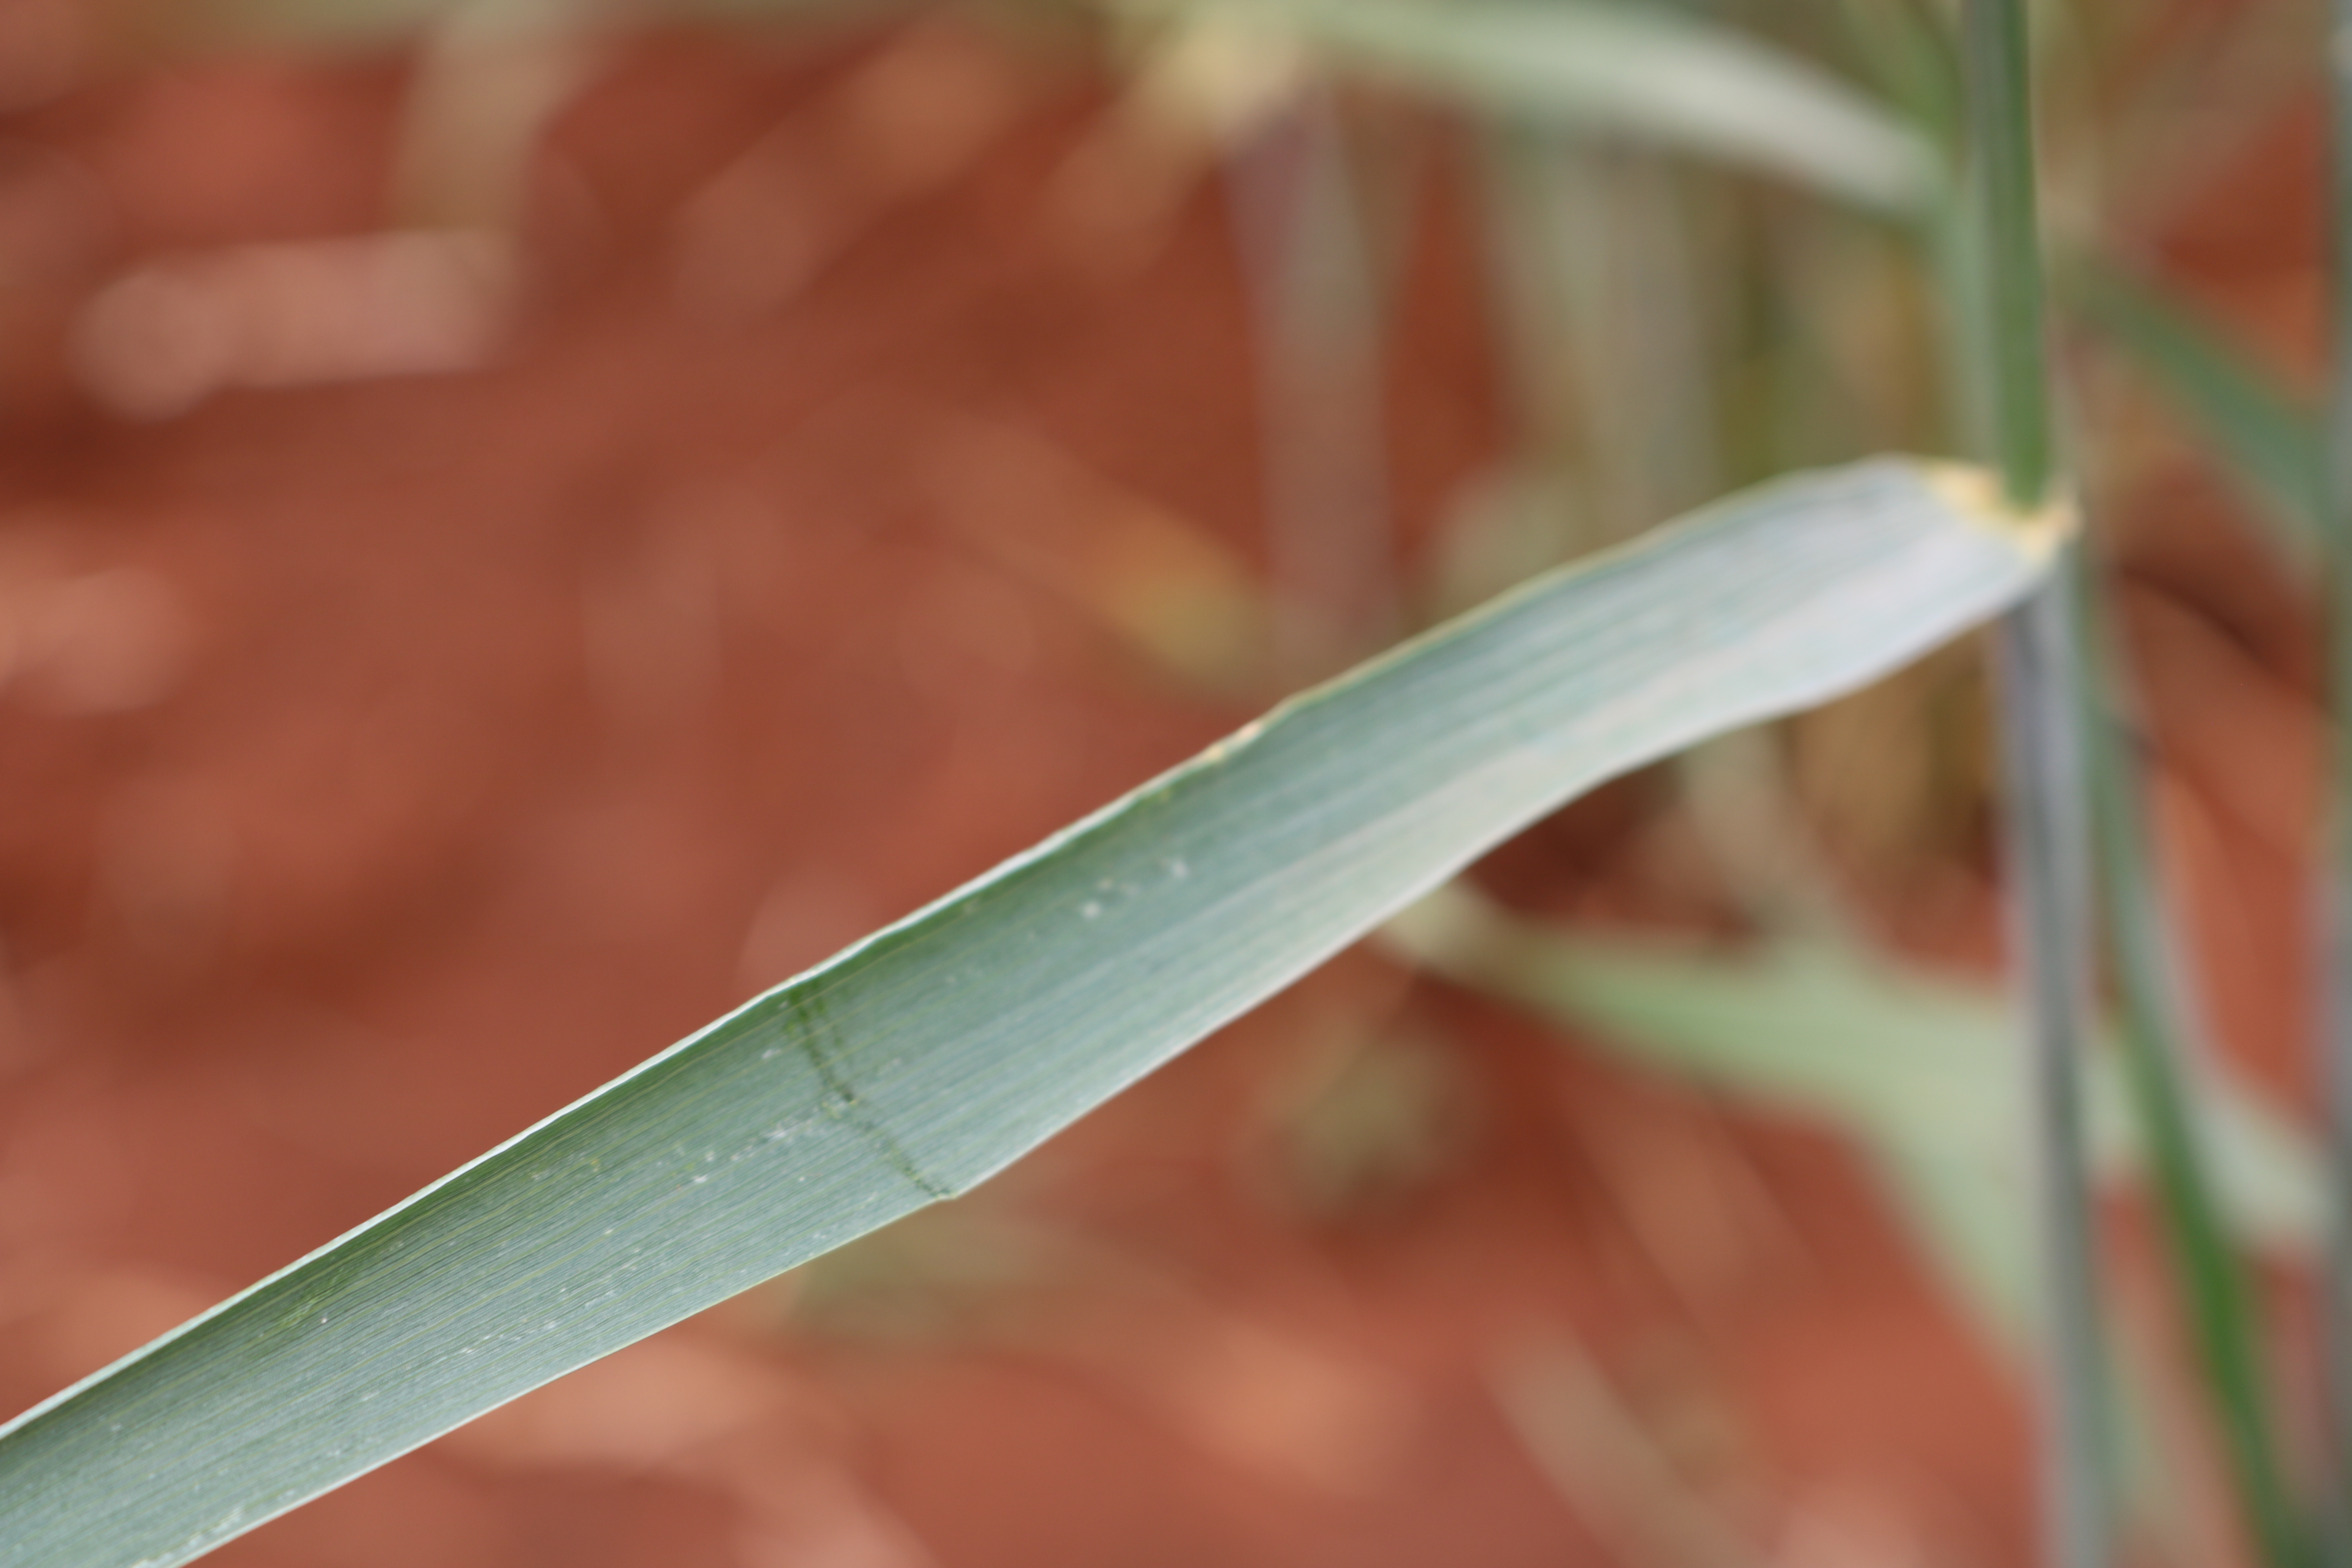

In [6]:
from PIL import Image
import IPython.display as display

image_path = r'C:\Users\Vikas\Desktop\dataset\train\healthy\loh(1).JPG'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

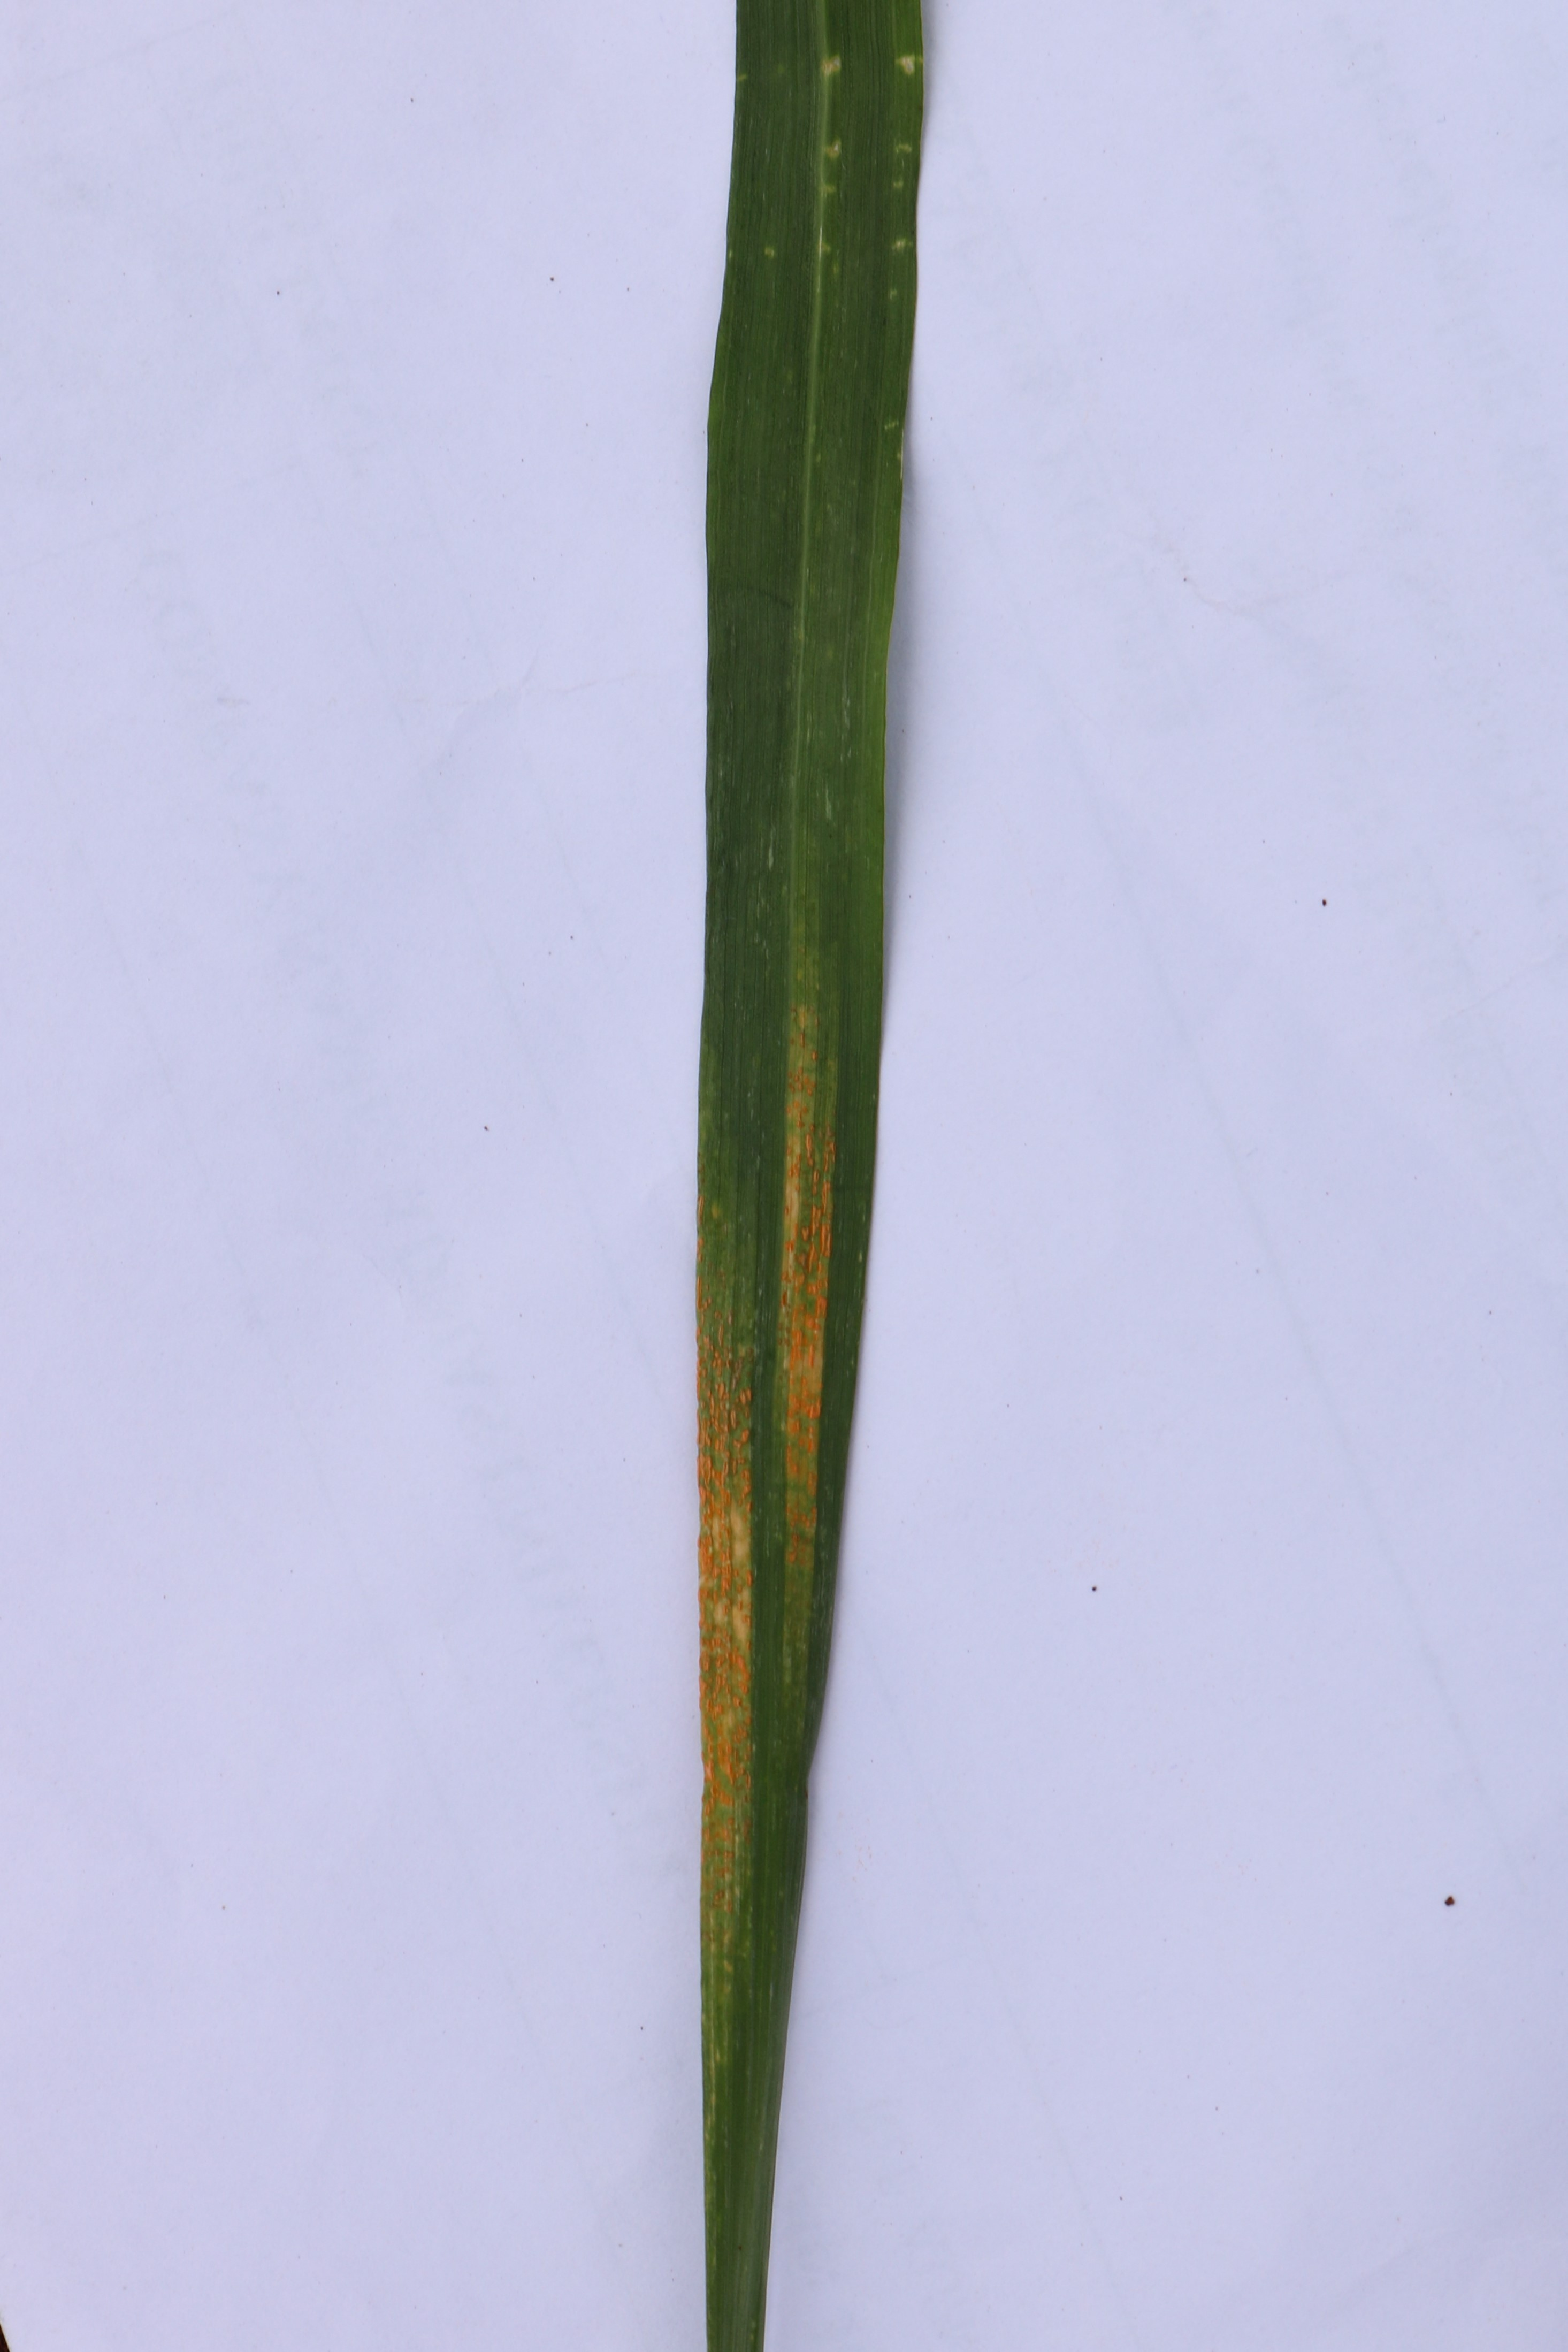

In [7]:
image_path = r'C:\Users\Vikas\Desktop\dataset\train\stripe_rust\lolr(2).JPG'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
import keras
print(keras.__version__)

3.3.3


In [10]:
pip install keras

In [11]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check if TensorFlow is using GPU (if available)
print("GPU available:" if tf.config.list_physical_devices('GPU') else "No GPU available")


TensorFlow version: 2.16.1
No GPU available


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\Vikas\Desktop\dataset\train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r'C:\Users\Vikas\Desktop\dataset\valid',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 270 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 299s 14s/step - accuracy: 0.3549 - loss: 3.6018 - val_accuracy: 0.3750 - val_loss: 1.2449
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 272s 9s/step - accuracy: 0.5474 - loss: 0.9445 - val_accuracy: 0.3472 - val_loss: 1.5663
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 249s 9s/step - accuracy: 0.5539 - loss: 0.8727 - val_accuracy: 0.4722 - val_loss: 1.1479
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 255s 9s/step - accuracy: 0.6751 - loss: 0.6547 - val_accuracy: 0.5417 - val_loss: 1.8040
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - accuracy: 0.8130 - loss: 0.4347 - val_accuracy: 0.4444 - val_loss: 1.5698


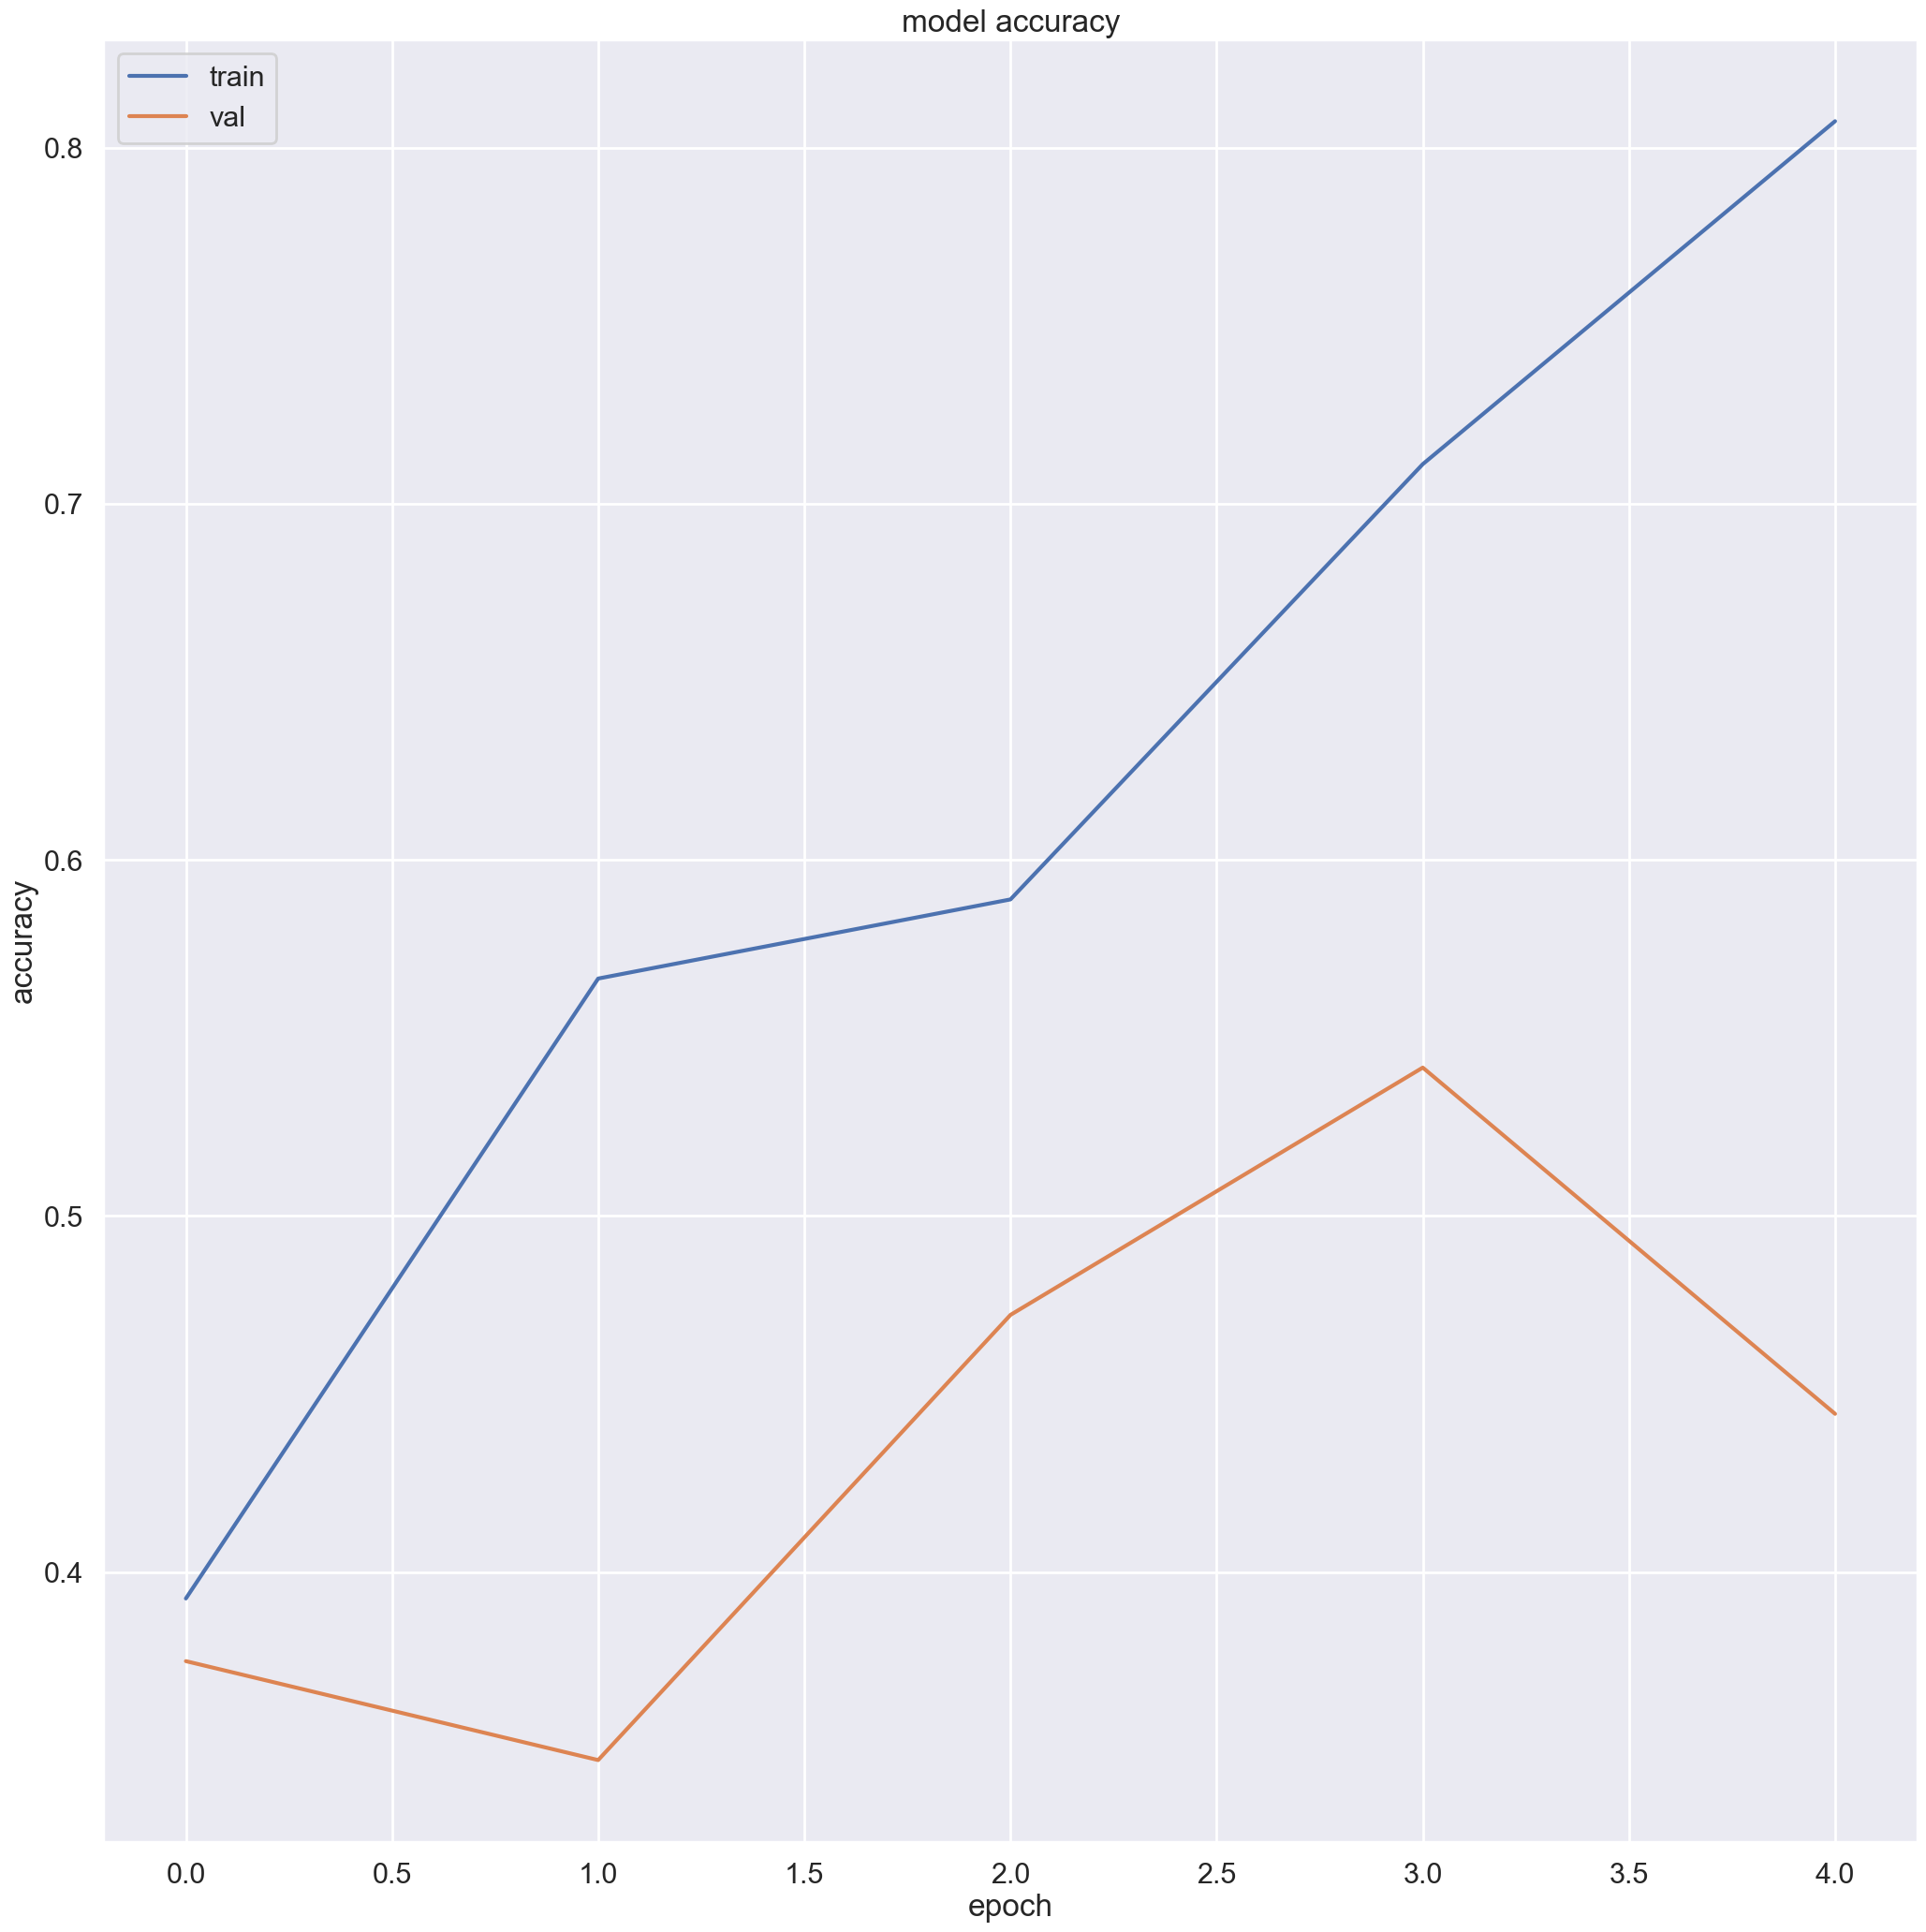

In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.save("model.h5")

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r'C:\Users\Vikas\Desktop\dataset\test\stripe_rust\lolr(175).JPG')

In [20]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


array([0.1283892 , 0.00956749, 0.8620433 ], dtype=float32)

In [21]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'healthy', 1: 'septoria', 2: 'stripe_rust'}

In [22]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

stripe_rust


In [23]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import Label, Button
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model


In [27]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import Label, Button
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
from tkinter import PhotoImage,ttk

# Define global variables
img = None
model_path = r'C:\Users\Vikas\14_may_major\model.h5'

# Load the model
try:
    model = load_model(model_path)
except Exception as e:
    messagebox.showerror("Error", f"Failed to load model: {str(e)}")

def load_image():
    global img, img_label
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    if file_path:
        img = Image.open(file_path)
        img = img.resize((250, 250), Image.LANCZOS)
        img_tk = ImageTk.PhotoImage(img)
        img_label.config(image=img_tk)
        img_label.image = img_tk

def detect_disease():
    if img is None:
        messagebox.showerror("Error", "Please upload an image first")
        return

    # Convert PIL image to a format suitable for the model (e.g., NumPy array)
    img_array = np.array(img.resize((224, 224), Image.LANCZOS)) / 255.0  # Example for a model that takes 224x224 images
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using the model
    try:
        prediction = model.predict(img_array)
        result = np.argmax(prediction, axis=1)[0]
        # Map result to disease name
        if result == 0:
            disease_name = "Healthy"
        elif result == 1:
            disease_name = "Septoria"
        elif result == 2:
            disease_name = "Stripe rust"
        else:
            disease_name = "Unknown"
        messagebox.showinfo("Result", f"Detected Disease: {disease_name}")
    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {str(e)}")

# Initialize the Tkinter application
app = tk.Tk()
app.state("zoomed")
app.title("Wheat Plant Disease Detection")
app.geometry("400x400")
app.configure(bg='black')

img=Image.open(r"C:\Users\Vikas\Desktop\canva.jpg").resize((1500,800))
image_tk=ImageTk.PhotoImage(img, master=app)
l2=Label(app, image=image_tk)
l2.place(x=0, y=0, relwidth=1, relheight=1)

#HEADING
#heading = tk.Label(app, text="WHEAT PLANT DISEASE DETECTION USING DEEP LEARNING", font=("Helvetica", 24, "bold"))
#heading.pack(pady=20)  # Add some padding for better appearance

# Add upload button
upload_button = Button(app, text="Upload Image", command=load_image, bg='white')
upload_button.place(x=550,y=200)

# Add image label
img_label = Label(app, bg='black')
img_label.place(x=475,y=230)

# Add detect button
detect_button = Button(app, text="Detect Disease", command=detect_disease, bg='white')
detect_button.place(x=550,y=550)

# Start the Tkinter main loop
app.mainloop()


Exception ignored in: <function PhotoImage.__del__ at 0x0000015CD2E991C0>
Traceback (most recent call last):
  File "C:\Users\Vikas\anaconda3\Lib\site-packages\PIL\ImageTk.py", line 132, in __del__
    name = self.__photo.name
           ^^^^^^^^^^^^
AttributeError: 'PhotoImage' object has no attribute '_PhotoImage__photo'


NameError: name 'image_tk' is not defined